### Quick Map Plot

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa296e75048>)

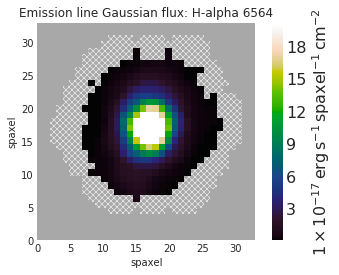

In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
from marvin.tools import Maps
maps = Maps('8485-1901')
ha = maps.emline_gflux_ha_6564
ha.plot()

In [13]:
import matplotlib.pyplot as plt
from marvin.tools import Maps
maps = Maps('8485-1901')
ha = maps.emline_gflux_ha_6564
print(ha)
print(ha.value)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 1e-17 erg / (cm2 s spaxel)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [45]:
import numpy.matlib 
import numpy as np 
la1=np.ones((5,5),dtype = float)
la2=np.zeros((5,5),dtype = float)
la=np.divide(la1,la2)
print (la)

[[inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]]


NameError: name 'python' is not defined

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa28f406a90>)

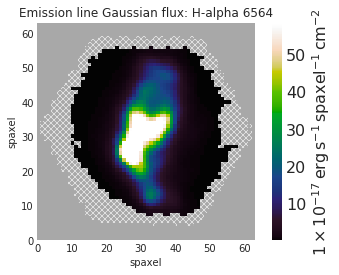

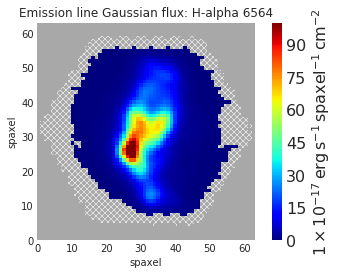

In [46]:
import matplotlib.pyplot as plt
from marvin.tools import Maps
%matplotlib inline
maps = Maps('8252-9102')

nii = maps.emline_gflux_nii_6585
ha = maps.emline_gflux_ha_6564
ha.plot()
ha.plot(cmap='jet',cbrange=(0.1,100))

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa28f617748>)

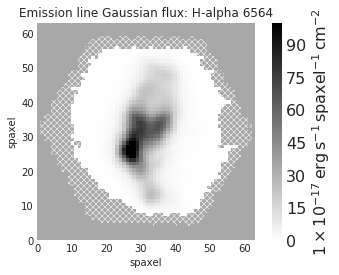

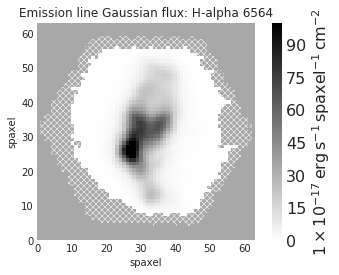

In [29]:
ha.plot(cmap=plt.get_cmap('gray_r'),cbrange=(0.1,100))
ha.plot(cmap='gray_r',cbrange=(0.1,100))


### Quick Spectrum Plot

In [27]:
ha.plot?

In [26]:
import marvin.utils.plot.map as mapplot
mapplot?

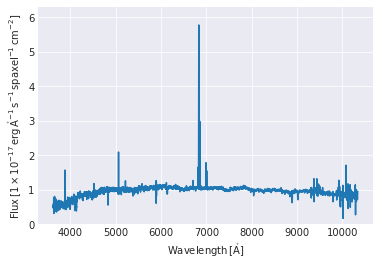

In [3]:
from marvin.tools import Cube
cube = Cube('8485-1901')
spax = cube[17, 17]
spax.flux.plot()

### Quick Image Plot

/root/anaconda3/lib/python3.7/socket.py:660: ResourceWarning: unclosed <socket.socket fd=53, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('144.34.230.232', 54882), raddr=('155.101.19.23', 443)>
  self._sock = None


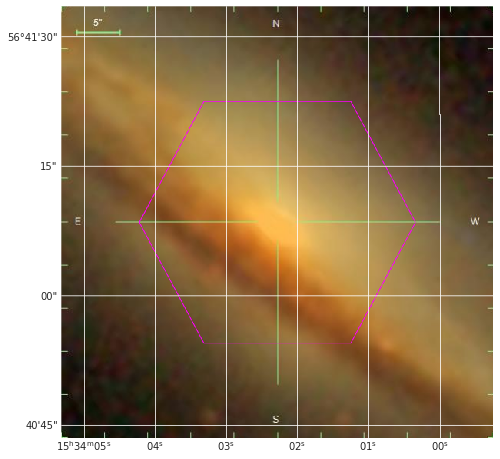

In [6]:
import matplotlib.pyplot as plt
from marvin.tools.image import Image
image = Image(plateifu='8553-12702')
image.plot()

### Multi-panel Map Plot (Single Galaxy)

In [ ]:
import matplotlib.pyplot as plt
from marvin.tools import Maps
import marvin.utils.plot.map as mapplot

maps = Maps('8485-1901')
stvel = maps['stellar_vel']
ha = maps['emline_gflux_ha_6564']
d4000 = maps['specindex_d4000']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, map_ in zip(axes, [stvel, ha, d4000]):
    mapplot.plot(dapmap=map_, fig=fig, ax=ax)

fig.tight_layout()

### Multi-panel Map Plot (Multiple Galaxies)

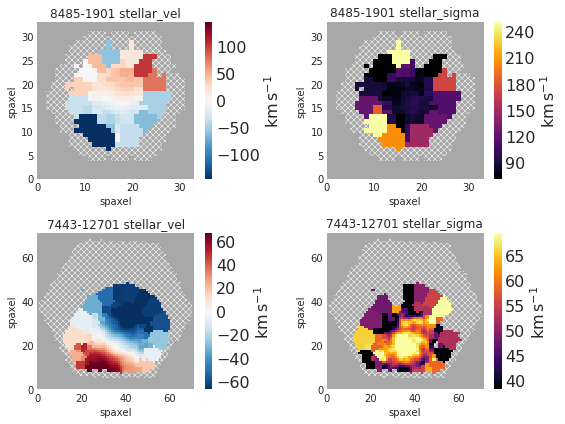

In [7]:
import matplotlib.pyplot as plt
from marvin.tools import Maps
import marvin.utils.plot.map as mapplot

plateifus = ['8485-1901', '7443-12701']
mapnames = ['stellar_vel', 'stellar_sigma']

rows = len(plateifus)
cols = len(mapnames)
fig, axes = plt.subplots(rows, cols, figsize=(8, 6))
for row, plateifu in zip(axes, plateifus):
    maps = Maps(plateifu=plateifu)
    for ax, mapname in zip(row, mapnames):
        mapplot.plot(dapmap=maps[mapname], fig=fig, ax=ax, title=' '.join((plateifu, mapname)))

fig.tight_layout()

### Zoom-in Map Plot

[13, 21, 13, 21]

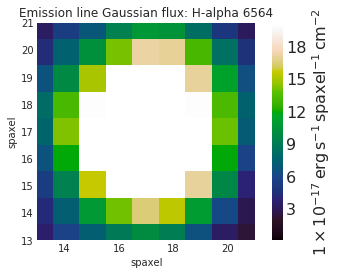

In [9]:
from marvin.tools import Maps
maps = Maps('8485-1901')
ha = maps.emline_gflux_ha_6564

fig, ax = ha.plot()
ax.axis([13, 21, 13, 21])

# Custom Map Colorbar Range Options

In [10]:
:align: center
:include-source: True

from marvin.tools import Maps
maps = Maps('8485-1901')
ha = maps.emline_gflux_ha_6564

fig, ax = ha.plot(percentile_clip=(1, 99))
fig, ax = ha.plot(sigma_clip=2)
fig, ax = ha.plot(cbrange=[2, 10])
fig, ax = ha.plot(symmetric=True)
fig, ax = ha.plot(log_cb=True)

SyntaxError: invalid syntax (<ipython-input-10-a2a584c73d88>, line 1)

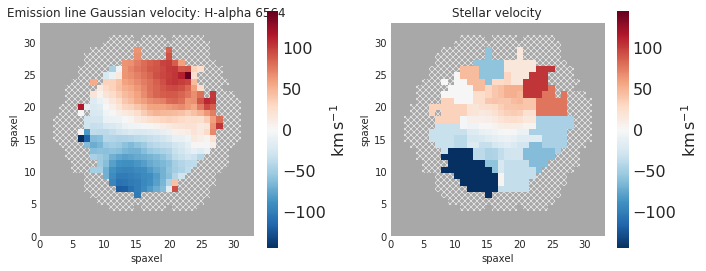

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from marvin.tools import Maps
import marvin.utils.plot.map as mapplot

maps = Maps('8485-1901')
havel = maps.emline_gvel_ha_6564
stvel = maps.stellar_vel
vel_maps = [havel, stvel]

cbranges = [vel_map.plot(return_cbrange=True) for vel_map in vel_maps]
cb_max = np.max(np.abs(cbranges))
cbrange = (-cb_max, cb_max)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
for ax, vel_map in zip(axes, vel_maps):
    vel_map.plot(fig=fig, ax=ax, cbrange=cbrange)

fig.tight_layout()

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa28c090f98>)

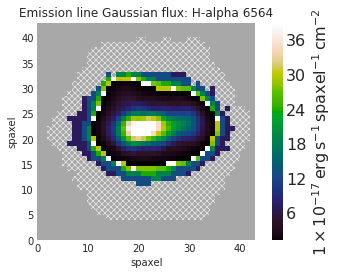

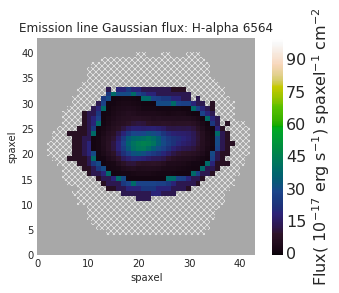

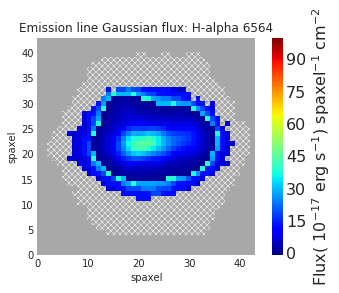

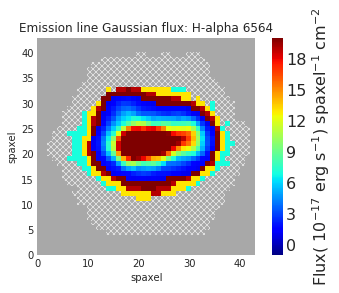

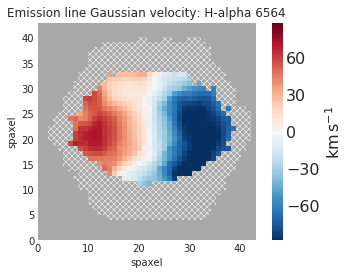

In [53]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from marvin.tools import Maps
import marvin.utils.plot.map as mapplot

maps = Maps('8551-3701')
nii = maps.emline_gflux_nii_6585
ha = maps.emline_gflux_ha_6564
havel = maps.emline_gvel_ha_6564

ha_class=ha.value
ha_class[np.where((ha.value < 0.3)&(ha.value >= 0))] = 7
ha_class[np.where((ha.value < 0.5)&(ha.value >= 0.3))  ] = 13
ha_class[np.where((ha.value >= 0.5) & (ha.value < 0.6))] = 19
ha_class[np.where((ha.value >= 0.6) & (ha.value < 0.65))] = 24
ha_class[np.where((ha.value >= 0.65) & (ha.value < 0.7))] = 27
ha_class[np.where((ha.value >= 0.7) & (ha.value < 0.8))] = 28
ha_class[np.where((ha.value >= 0.8) & (ha.value < 0.9))] = 39
ha_class[np.where((ha.value >= 0.9) & (ha.value < 1.0))] = 30






ha.plot(cmap)
ha.plot(cbrange=(-1,100),cblabel='Flux( $10^{-17}$ erg s$^{-1}$) spaxel$^{-1}$ cm$^{-2}$' )
ha.plot(cmap='jet',cbrange=(-1,100),cblabel='Flux( $10^{-17}$ erg s$^{-1}$) spaxel$^{-1}$ cm$^{-2}$' )
ha.plot(cmap='jet',cbrange=(-1,20),cblabel='Flux( $10^{-17}$ erg s$^{-1}$) spaxel$^{-1}$ cm$^{-2}$' )